In [106]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

import urllib.request
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
import scipy.stats as st

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.
    
    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified 
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

# ME 308 - Activity 01 - Investigating Turbulent Boundary Layers

To be given after Lecture 25: Pressure Gradient Effects; Boundary Layer Separation <br>
Reading: Fox and MxDonald, 9th Edition, Pages 353-374


### Question 1: Review of Reynolds Number

The Reynolds number is a dimensionless number that is used to determine the type of flow that is present in a fluid. It is defined as:

$$Re = \frac{\rho V D}{\mu}$$

where $\rho$ is the density of the fluid, $V$ is the velocity of the fluid, $D$ is a characteristic length of the flow (in our case diameter of the pipe), and $\mu$ is the dynamic viscosity of the fluid. The Reynolds number is used to determine whether a flow is laminar or turbulent. Laminar flow occurs at low Reynolds numbers, while turbulent flow occurs at high Reynolds numbers. The transition between laminar and turbulent flow is not well defined, but is generally accepted to occur at a Reynolds number of 2300.

We will write you a python function to calculate the Reynolds number for a given flow. It outputs the Reynolds number and whether the flow is laminar or turbulent based on the the previoiusly mentioned criteria. You will need to use this function in the following problems.

In [107]:
def reynolds_number(density, velocity, diameter, viscosity):
    re = (density * velocity * diameter) / viscosity
    return re

Test the function with the following inputs:

In [108]:
density = 1.225 # kg/m^3
velocity = 0.1 # m/s
diameter = 1.0 # m
viscosity = 1.81e-5 # Pa*s

Use the function to calculate the Reynolds number for the defined flow and determine whether the flow is laminar or turbulent. Adjust the inputs to see how the Reynolds number changes.

In [109]:
re = reynolds_number(density, velocity, diameter, viscosity)
print(f"The Reynolds number is {re:.2f}")
# print whether the flow is laminar or turbulent based on the 2300 cutoff
if re < 2300:
    print("The flow is laminar")
else:
    print("The flow is turbulent")

The Reynolds number is 6767.96
The flow is turbulent


We want to see how the Reynolds number changes with the diamter of the pipe. All other inputs will be kept constant. Plot the Reynolds number as a function of the diameter of the pipe. Use a diameter range of 0.1 to 1.0 m. Use a step size of 0.1 m. Use the function to calculate the Reynolds number for each diameter. Plot the Reynolds number as a function of the diameter of the pipe. Use the 'ax.axhline' to add a horizontal line at the critical Reynolds number. Label the axes and include a title.

In [110]:
# Your code here

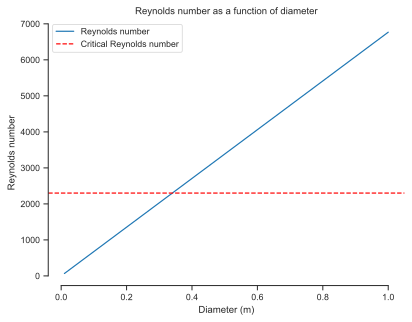

In [111]:
# plot the Reynolds number as a function of velocity for a range of diameters
diameters = np.linspace(0.01, 1.0, 100)
reynolds_numbers = reynolds_number(density, velocity, diameters, viscosity)
fig, ax = plt.subplots()
ax.plot(diameters, reynolds_numbers, label="Reynolds number")
# add a horizontal line at the critical Reynolds number
ax.axhline(2300, color="red", linestyle="--", label="Critical Reynolds number")
ax.set_xlabel("Diameter (m)")
ax.set_ylabel("Reynolds number")
ax.set_title("Reynolds number as a function of diameter")
ax.legend()
sns.despine(trim=True)


If you wish to learn more about characterizing turbulent flow, I encourage you to read about some of the following length scales: [Kolmogorov length scale](https://www.ams.jhu.edu/~eyink/Turbulence/classics/Kolmogorov41a.pdf), [Taylor microscale](https://www.ams.jhu.edu/~eyink/Turbulence/classics/Taylor35a1.pdf), and [Integral length scale](https://en.wikipedia.org/wiki/Integral_length_scale).
How these length scales are used to characterize different sized eddies in turbulent flow is beyond the scope of this course. However, it is interesting to see how the Reynolds number is used to further describe the flow.

## Question 2: Velocity Profiles

The velocity profile of a flow is the distribution of velocities across the cross section of the flow. The flows also develop as a function of distance from the inlet. Laminar flow develops quickly, while turbulent flow takes longer to develop. 
<figure>
 <img src="https://encyclopedia.pub/media/common/202210/mceclip0-634cbc5ce422d.png" width="800" height="300">
 <figcaption>Developing Velocity Profile of Fluid in a Pipe.</figcaption>
</figure>

As has been proved in section 8.3 of Fox and McDonald, the velocity profile of a fully developed laminar flow in a pipe is shown to be a parabola. Some toy data is given below for a laminar flow in a pipe. Plot the velocity profile of the laminar flow in a pipe. Label the axes and include a title.

In [112]:
# Toy data in the shape of fully developed laminar flow in a pipe
y = np.linspace(-1, 1, 100)
u = - y**2 + 1

In [113]:
# Your code here

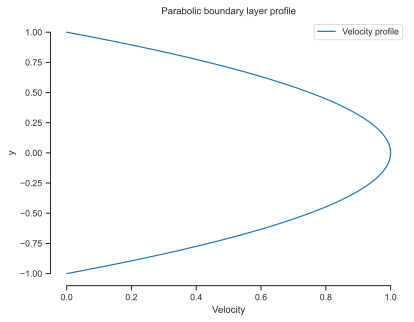

In [114]:
# plot the parabola
fig, ax = plt.subplots()
ax.plot(u, y, label="Velocity profile")
ax.set_xlabel("Velocity")
ax.set_ylabel("y")
ax.set_title("Parabolic boundary layer profile")
ax.legend()
sns.despine(trim=True)

Calculate the correlation between the distance from the wall and the velocity. Use the 'np.corrcoef' function to calculate the correlation coefficient. 

In [115]:
# Your code here

In [116]:
# calculate the correlation coefficient
corr = np.corrcoef(u, y)[0, 1]
print(f"The correlation coefficient is {corr:.2f}")

The correlation coefficient is -0.00


Does this correlation coefficient mean that the velocity is independent of the distance from the wall? Why or why not?

*Your answer here:*

No, the correlation coefficient is not a measure of independence. It is a measure of the strength of the linear relationship between two variables. In this case, the correlation coefficient is very close to 0, which means that there is no linear relationship between the distance from the wall and the velocity. However, there is a non-linear relationship, a parabolic relationship, between the distance from the wall and the velocity.

#### Turbulent Velocity Profiles

The velocity profile is dependent on the type of flow. Laminar flow has a parabolic velocity profile, while turbulent flow has a flat velocity profile. See the difference in the image below:

<figure>
 <img src="https://engineeringlibrary.org/static/img/References/DOE-Fundamentals-Handbook/fluid-flow/fig-5-laminar-and-turbulent-flow-velocity-profiles.webp" width="400" height="400">
 <figcaption>Velocity Profiles of Laminar and Turbulent Flows.</figcaption>
</figure>

In the next question we will be looking at experimental data collected from a turbulent flow in a wind tunnel. You will observe the shape of a turbulent velocity profile and characterize it with a model. The data is given in a zip file. Unzip it in the directory that this jupyter notebook is in. 

## Question 3: Experimental Data
We will look at a set of experiments performed by Dr. John Eaton at Stanford University. The experiments were performed in a low-speed wind tunnel with a 2-D rounded backstep.  The results are available at the following website: https://turbmodels.larc.nasa.gov/Other_exp_Data/roundedbackstep_exp.html
<br><br> The flow geometry, as shown in the figure below, included a contraction section, a 320 mm long flat plate for boundary layer relaxation, a smoothly contoured ramp, a downstream flat plate (630 mm long), and a diffuser. The ramp had specific dimensions, including a circular arc shape with a 127 mm radius, a height (h) of 21 mm, and a length (L) of 70 mm. The boundary layer separated about three-quarters of the way along the ramp and reattached on the downstream flat plate, generating a separation bubble around the trailing edge. The separation and reattachment points were determined by scanning the streamwise velocity above the surface. The downstream flat plate, about nine ramp lengths long, allowed the flow to recover from the perturbation.

<figure>
 <img src="https://turbmodels.larc.nasa.gov/Other_exp_Data/Roundedbackstep/fig_overview.png" width="700" height="300">
 <figcaption>Flow Geometry of 2-D Rounded Backstep.</figcaption>
</figure>

#### Part A: Loading the Data
We have preprocessed the data for you and given it to you as a zip file. The zip file contains multiple [netCDF](https://www.unidata.ucar.edu/software/netcdf/) files. NetCDF is a file format that is commonly used in scientific computing. It is a self-describing format that allows for the storage of large amounts of data. The data is stored in a hierarchical structure that includes dimensions, variables, and attributes. The dimensions are the axes of the data. The variables are the data itself. The attributes are metadata that describe the data. The data is stored in a binary format that is optimized for fast data access. You will access it using the [xarray](http://xarray.pydata.org/en/stable/) package. <br> <br> Xarray is a python package that is used to read and manipulate netCDF files. It is built on top of the [numpy](https://numpy.org/) package. You will need to install xarray in google colab. You can do this by running the following command in a code cell:

In [117]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


Now we can import the library and use it

In [118]:
import xarray as xr

We will demonstrate how to use xarray to read the netCDF files. We will then turn it into a pandas dataframe for easier manipulation. This is done for you for the Re = 1100 case. First we have will download the data and then read it using xarray. We will then convert it to a pandas dataframe.

In [119]:
url = 'https://github.com/ebilionis/core-me-data-science-activities-public/raw/refs/heads/main/me308/Re01100.nc'
download(url)
nc_01100 = xr.open_dataset("Re01100.nc")
df_01100 = nc_01100.to_dataframe()

You can see how each of the variables recorded is a column in the dataframe. You can view these variables and the first 5 rows of the dataframe by running the following command:

In [120]:
df_01100.head()

,y[mm],y_on_h,yplus[ref],y_on_d99[ref],y_on_delta[ref],y_on_theta[ref],yplus[loc],y_on_d99[loc],y_on_delta[loc],y_on_theta[loc],...,V[i],uu[i],vv[i],(-uv)[i],U[o],V[o],uu[o],vv[o],uu_on_UtauUe[loc],x_pos
index,,,,,,,,,,,,,,,,,,,,,
0,0.150,0.00714,3.03,0.00587,0.0414,0.057,3.30,0.00594,0.0480,0.0673,...,-0.228,0.498,0.0168,0.064,0.077,-0.0114,0.00124,0.000042,0.0248,0.0
1,0.195,0.00927,3.93,0.00762,0.0538,0.074,4.28,0.00771,0.0622,0.0873,...,-0.296,0.814,0.0294,0.108,0.104,-0.0148,0.00202,0.000073,0.0406,0.0
2,0.253,0.01200,5.09,0.00988,0.0698,0.096,5.55,0.01000,0.0807,0.1130,...,-0.380,1.320,0.0397,0.176,0.140,-0.0190,0.00328,0.000099,0.0659,0.0
3,0.328,0.01560,6.61,0.01280,0.0905,0.125,7.20,0.01300,0.1050,0.1470,...,-0.515,2.410,0.0655,0.314,0.196,-0.0257,0.00598,0.000163,0.1200,0.0
4,0.425,0.02020,8.58,0.01660,0.1170,0.162,9.35,0.01680,0.1360,0.1910,...,-0.703,3.770,0.1090,0.531,0.272,-0.0351,0.00936,0.000271,0.1880,0.0


Or see all the variables by running the following command:

In [121]:
print(df_01100.keys())

Index(['y[mm]', 'y_on_h', 'yplus[ref]', 'y_on_d99[ref]', 'y_on_delta[ref]',
       'y_on_theta[ref]', 'yplus[loc]', 'y_on_d99[loc]', 'y_on_delta[loc]',
       'y_on_theta[loc]', 'U[ri]', 'V[ri]', 'uu[ri]', 'vv[ri]', '(-uv)[ri]',
       'U[ro]', 'V[ro]', 'uu[ro]', 'vv[ro]', '(-uv)[ro]', 'uu_on_UtauUe',
       'U[i]', 'V[i]', 'uu[i]', 'vv[i]', '(-uv)[i]', 'U[o]', 'V[o]', 'uu[o]',
       'vv[o]', 'uu_on_UtauUe[loc]', 'x_pos'],
      dtype='object')


The meaning of all of the variables can be seen in the README file that is included in the zip file. The variables that we will be using are the following:
- x_pos: The x position of the measurement normalized by the ramp length (70mm) beginning at the leading edge of the ramp.
- y[mm]: The y position of the measurement in mm beginning at the bottom of the ramp.
- U[i]: The streamwise velocity normalized by the local inner scale 
- V[i]: The wall-normal velocity normalized by the local inner scale

The inner scale is a length scale that is used to normalize the velocity. It is defined as:

$$\delta_{i} = \frac{\nu}{u_{\tau}}$$

where $\nu$ is the kinematic viscosity of the fluid and $u_{\tau}$ is the friction velocity. The friction velocity is defined as:

$$u_{\tau} = \sqrt{\frac{\tau_{w}}{\rho}}$$

where $\tau_{w}$ is the wall shear stress and $\rho$ is the density of the fluid. The wall shear stress is defined as:

$$\tau_{w} = \mu \frac{du}{dy}$$

where $\mu$ is the dynamic viscosity of the fluid and $\frac{du}{dy}$ is the velocity gradient at the wall. 

This comes from the [law of the wall](https://en.wikipedia.org/wiki/Law_of_the_wall), which is an empirical relationship that is used to describe the velocity profile of a turbulent flow. The law of the wall is defined as:

$$\frac{u}{u_{\tau}} = \frac{1}{\kappa} \ln{\frac{y}{\delta_{i}}} + B$$

where $\kappa$ is the von Karman constant and $B$ is the constant of integration. The von Karman constant is a dimensionless constant that is used to describe the logarithmic velocity profile of a turbulent flow. This is what we will be having you recreate in the following problem. 
<br><br> <br>
First load in the data for the other reynolds numbers cases. 



In [158]:
url = 'https://github.com/ebilionis/core-me-data-science-activities-public/raw/refs/heads/main/me308/Re03400.nc'
download(url)
nc_03400 = xr.open_dataset("Re03400.nc")
df_03400 = nc_03400.to_dataframe()
url = 'https://github.com/ebilionis/core-me-data-science-activities-public/raw/refs/heads/main/me308/Re07100.nc'
download(url)
nc_07100 = xr.open_dataset("Re07100.nc")
df_07100 = nc_07100.to_dataframe()
url = 'https://github.com/ebilionis/core-me-data-science-activities-public/raw/refs/heads/main/me308/Re13200.nc'
download(url)
nc_13200 = xr.open_dataset("Re13200.nc")
df_13200 = nc_13200.to_dataframe()
url = 'https://github.com/ebilionis/core-me-data-science-activities-public/raw/refs/heads/main/me308/Re20100.nc'
download(url)
nc_20100 = xr.open_dataset("Re20100.nc")
df_20100 = nc_20100.to_dataframe()

In the README, you will see that "If a whole section of data has 0.00 value, that means the data are not available." This will be relevant for us in velocity measurements. We will need to remove these values from the dataframes. This is called cleaning the data. You can do this by running the following command:

In [124]:
df_01100 = df_01100[df_01100['U[i]'] > 1]

Please repeat this for the dataframes for the other Reynolds numbers.

In [125]:
# Your code here

In [126]:
# remove the rows where the velocity is less than 1
df_03400 = df_03400[df_03400['U[i]'] > 1]
df_07100 = df_07100[df_07100['U[i]'] > 1]
df_13200 = df_13200[df_13200['U[i]'] > 1]
df_20100 = df_20100[df_20100['U[i]'] > 1]


#### Part B: Plotting the Velocity Profiles

You will use the [quiver plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html) to visualize the 2-D velocity field measured at various locations in the wind tunnel. The quiver plot is a type of plot that is used to visualize vector fields. It is commonly used in fluid mechanics to visualize the velocity field. The quiver plot is a 2-D plot that uses arrows to represent the magnitude and direction of the vector field. The arrows are placed at the location of the vector field. The length of the arrow represents the magnitude of the vector field. The direction of the arrow represents the direction of the vector field. The scale argument helps reshape the arrow length to a more readable size. Use ax.set_ylim and ax.set_xlim to investigate specific regions of the velocity field in greater detail. The following code will plot the velocity field for the Re = 1100 case.

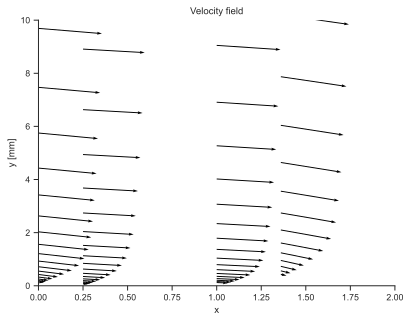

In [127]:
fig, ax = plt.subplots()
ax.quiver(df_01100['x_pos'], df_01100['y[mm]'], df_01100['U[i]'], df_01100['V[i]'], scale=100)
ax.set_xlabel("x")
ax.set_ylabel("y [mm]")
ax.set_title("Velocity field");
ax.set_ylim(0, 10)
ax.set_xlim(0, 2)
sns.despine(trim=True)

Repeat for the rest of the Reynolds number cases. Use as many blocks as needed

In [128]:
# Your code here

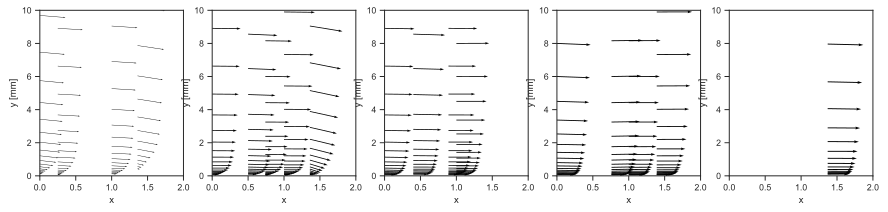

In [129]:
# make a list of the dataframes
dfs = [df_01100, df_03400, df_07100, df_13200, df_20100]

# loop through the dataframes creating the quiver plots
fig, axes = plt.subplots(1, len(dfs), figsize=(15, 3))
for df, ax in zip(dfs, axes):
    ax.quiver(df['x_pos'], df['y[mm]'], df['U[i]'], df['V[i]'], scale=100)
    ax.set_xlabel("x")
    ax.set_ylabel("y [mm]")
    # ax.set_title(f"Re = {df['Re'].unique()[0]}")
    ax.set_ylim(0, 10)
    ax.set_xlim(0, 2)


Do these velocity fields look laminar or turbulent? Why? Is there a difference between the velocity fields for the different Reynolds numbers? Why or why not?

*Your answer here:*

These velocity fields look turbulent because the velocity vectors are not aligned and the velocity profile is not parabolic. They should also look more turbulent than the the Re = 1100 case because the Reynolds number is higher.

#### Part C: Law of the Wall

We will now guide you in finding a model for the "law of the wall". The law of the wall is previously defined as:

$$\frac{u}{u_{\tau}} = \frac{1}{\kappa} \ln{\frac{y}{\delta_{i}}} + B$$

The paper we are pulling the data from replaces the $\frac{u}{u_{\tau}}$ with $U^{+}$ and the $\frac{y}{\delta_{i}}$ with $y^{+}$. This is done to normalize the velocity and distance from the wall. The equation then becomes:

$$U^{+} = \frac{1}{\kappa} \ln{y^{+}} + B$$

<br>

We will guide you in finding the constants $\kappa$ and $B$ for the Re = 1100 case. You will then use these constants to find the constants for the other Reynolds number cases. You will then plot the law of the wall and compare it to what is used in the paper. 


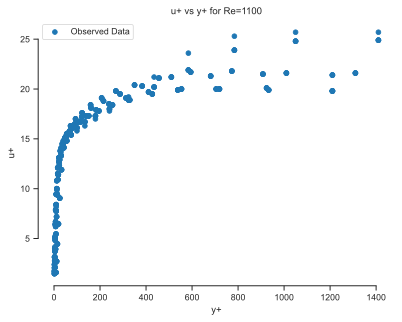

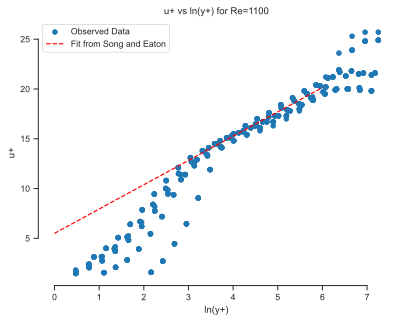

In [130]:
# make a scatter plot of the u+ vs y+ data
fig, ax = plt.subplots()
ax.scatter(df_01100['yplus[ref]'], df_01100['U[i]'], label="Observed Data")
ax.set_xlabel("y+")
ax.set_ylabel("u+")
ax.set_title("u+ vs y+ for Re=1100")
ax.legend()
sns.despine(trim=True)

# take the log of the y+ data
y_log = np.log(df_01100['yplus[ref]'])
# add the log of the y+ data to the dataframe
df_01100['y_log'] = y_log

# make scatter plot of the log of the y+ data vs the u+ data
fig, ax = plt.subplots()
ax.scatter(df_01100['y_log'], df_01100['U[i]'], label="Observed Data")
# plot the line from the paper
y_line = np.linspace(0, 6)
ax.plot(y_line, 2.44 * y_line + 5.5, color="red", linestyle="--", label="Fit from Song and Eaton")
ax.set_xlabel("ln(y+)")
ax.set_ylabel("u+")
ax.set_title("u+ vs ln(y+) for Re=1100")
ax.legend()
sns.despine(trim=True)

Notice that below a certain distance from the wall, the relationship is not linear in the log scale. This is called the viscous sublayer. The viscous sublayer is the region of the flow that is close to the wall. The viscous sublayer is where the viscous effects of the fluid are dominant. To model the law of the wall, we will only use the data that is outside of the viscous sublayer. In the same way that we cleaned the data by removing the 0.00 values, we will clean the data by removing the data that is in the viscous sublayer. Estimate the cutoff by inspection and plot the linear regime.

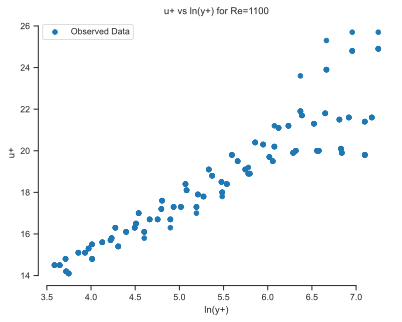

In [131]:
# remove the viscous sublayer data
linear_01100 = df_01100[df_01100['y_log'] > 3.5]

# plot the log of the y+ data vs the u+ data
fig, ax = plt.subplots()
ax.scatter(linear_01100['y_log'], linear_01100['U[i]'], label="Observed Data")
ax.set_xlabel("ln(y+)")
ax.set_ylabel("u+")
ax.set_title("u+ vs ln(y+) for Re=1100")
ax.legend()
sns.despine(trim=True)


We will now perform Bayesian Linear Regression using sklearn. We do this to avoid overfitting, provide an uncertainty estimate from the model, and expose you to Bayesian modeling. Learning the theory behind Bayesian Linear Regression is beyond the scope of this course. However, if you are interested, you can read more about it [here](https://towardsdatascience.com/introduction-to-bayesian-linear-regression-e66e60791ea7) and see an example from Professor Bilionis' ME539 course [here](https://predictivesciencelab.github.io/data-analytics-se/lecture14/hands-on-14.3.html#bayesian-linear-regression-example). Much of the code we use to build this model comes from this course.
<br><br>
We will use the Bayesian Linear Regression to find the constants $\kappa$ and $B$ for the Re = 1100 case. 
<br><br>
Begin by converting to numpy arrays and splitting the data into training and validation data. 

In [132]:
# convert the data to numpy arrays
x_data = linear_01100['y_log'].values
y_data = linear_01100['U[i]'].values

# split the data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

Use the following to visualize your split:

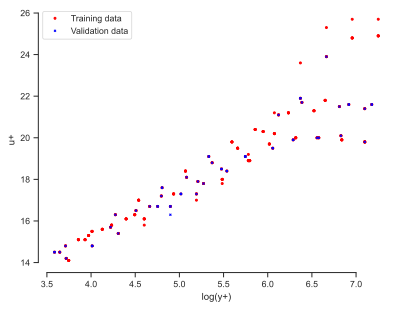

In [133]:
plt.figure()
plt.plot(
    x_train,
    y_train,
    'ro',
    markersize=2,
    label='Training data'
)
plt.plot(
    x_valid,
    y_valid,
    'bx',
    markersize=2,
    label='Validation data'
)
plt.xlabel('log(y+)')
plt.ylabel('u+')
plt.legend()
sns.despine(trim=True);

The next steps are functions to build the model. Feel free to simply call these functions and build the models. If you want to know more about where this code comes from you can read more [here](https://predictivesciencelab.github.io/data-analytics-se/lecture14/reading-14.html)

In [134]:
def get_polynomial_design_matrix(x, degree):
    """Return the polynomial design matrix of ``degree`` evaluated at ``x``.
    
    Arguments:
    x      -- A 2D array with only one column.
    degree -- An integer greater than zero.
    """
    assert isinstance(x, np.ndarray), 'x is not a numpy array.'
    assert x.ndim == 2, 'You must make x a 2D array.'
    assert x.shape[1] == 1, 'x must be a column.'
    cols = []
    for i in range(degree+1):
        cols.append(x ** i)
    return np.hstack(cols)

In [135]:
# The degree of 1 defines the model to be linear
degree = 1

# Design matrix
Phi = get_polynomial_design_matrix(x_train[:, None], degree)

# Fit
model = BayesianRidge(
    fit_intercept=False
).fit(Phi, y_train)

In [136]:
# From scikit-learn: model.alpha_ is the "Estimated precision of the noise."
sigma = np.sqrt(1.0 / model.alpha_)
print(f'sigma = {sigma:1.4f}')

sigma = 1.0324


Next we will calculate the mean squared error of the model. The mean squared error is defined as:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$$

where $n$ is the number of data points, $y_{i}$ is the actual value of the data point, and $\hat{y}_{i}$ is the predicted value of the data point. The mean squared error is a measure of how well the model fits the data. The lower the mean squared error, the better the model fits the data.

In [137]:
Phi_valid = get_polynomial_design_matrix(
    x_valid[:, None],
    degree
)
y_predict, y_std = model.predict(
    Phi_valid,
    return_std=True
)

# calculate mean squared error
mse = np.mean((y_predict - y_valid) ** 2)
print(f'MSE = {mse:1.2f}')

MSE = 0.63


Next, we will create something called a parity plot. A parity plot is a plot that compares the actual values of the data to the predicted values of the data. The closer the data points are to the line $y=x$, the better the model fits the data. The parity plot is a good way to visualize the accuracy of the model.

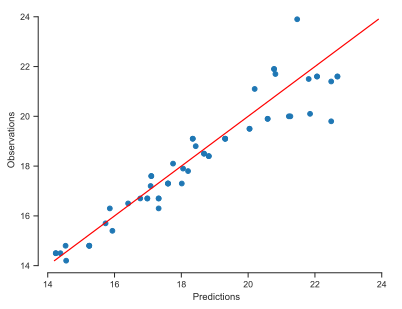

In [138]:
fig, ax = plt.subplots()
ax.plot(y_predict, y_valid, 'o')
yys = np.linspace(
    y_valid.min(),
    y_valid.max(),
    100)
ax.plot(yys, yys, 'r-')
ax.set_xlabel('Predictions')
ax.set_ylabel('Observations')
sns.despine(trim=True);

Next we will plot the standardized errors of the model. The standardized error is defined as:

$$\epsilon_{i} = \frac{y_{i} - \hat{y}_{i}}{\sigma_{y}}$$

where $y_{i}$ is the actual value of the data point, $\hat{y}_{i}$ is the predicted value of the data point, and $\sigma_{y}$ is the standard deviation of the actual values of the data. The standardized error is a measure of how far the actual values of the data are from the predicted values of the data. 

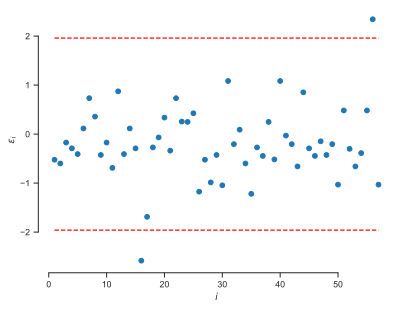

In [139]:
eps = (y_valid - y_predict) / y_std
idx = np.arange(1, eps.shape[0] + 1)

fig, ax = plt.subplots()
ax.plot(idx, eps, 'o', label='Standarized errors')
ax.plot(idx, 1.96 * np.ones(eps.shape[0]), 'r--')
ax.plot(idx, -1.96 * np.ones(eps.shape[0]), 'r--')
ax.set_xlabel('$i$')
ax.set_ylabel('$\epsilon_i$')
sns.despine(trim=True);

Another way to check model performance is the quantile-quantile plot. In a Q-Q plot, each data point from the sample is plotted against the corresponding quantile from the theoretical distribution. If the points lie approximately on a straight line, it suggests that the data follows the theoretical distribution. Deviations from the straight line indicate departures from the assumed distribution.

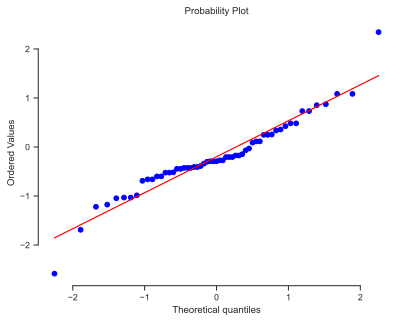

In [140]:
fig, ax = plt.subplots()
st.probplot(eps, dist=st.norm, plot=ax)
sns.despine(trim=True)

The Q-Q plot shows you where in the data distribution the model is performing well and where it is performing poorly. Here we see that the model is performing well for the majority of the data. However, it is performing poorly for the data that is far from the mean. This is common for linear regression models.

The next function is to help you visualize the model prediction and uncertainty. It is simply a plottiing function that plots the model prediction and uncertainty intervals. It breaks down these intervals into Epistemic and Aleatory uncertainty. Epistemic uncertainty is uncertainty that is due to a lack of knowledge. Aleatoric uncertainty is uncertainty that is due to the inherent "randomness" in the data. 

In [141]:
def plot_posterior_predictive(
    model,
    xx,
    phi_func,
    phi_func_args=(),
    y_true=None
):
    """Plot the posterior predictive separating
    aleatory and espitemic uncertainty.
    
    Arguments:
    model    -- A trained model.
    xx       -- The points on which to evaluate
                the posterior predictive.
    phi_func -- The function to use to compute
                the design matrix.
    
    Keyword Arguments:
    phi_func_args -- Any arguments passed to the
                     function that calculates the
                     design matrix.
    y_true        -- The true response for plotting.
    """
    Phi_xx = phi_func(
        xx[:, None],
        *phi_func_args
    )
    yy_mean, yy_measured_std = model.predict(
        Phi_xx,
        return_std=True
    )
    sigma = np.sqrt(1.0 / model.alpha_)
    yy_std = np.sqrt(yy_measured_std ** 2 - sigma**2)
    yy_le = yy_mean - 2.0 * yy_std
    yy_ue = yy_mean + 2.0 * yy_std
    yy_lae = yy_mean - 2.0 * yy_measured_std
    yy_uae = yy_mean + 2.0 * yy_measured_std

    fig, ax = plt.subplots()
    ax.plot(xx, yy_mean, 'r', label="Posterior mean")
    ax.fill_between(
        xx,
        yy_le,
        yy_ue,
        color='C0',
        alpha=0.25,
        label="95% epistemic credible interval"
    )
    ax.fill_between(
        xx,
        yy_lae,
        yy_le,
        color='C1',
        alpha=0.25
    )
    ax.fill_between(
        xx,
        yy_ue,
        yy_uae,
        color='C1',
        alpha=0.25,
        label="95% epistemic + aleatory credible interval"
    )
    ax.plot(x_data, y_data, 'kx', label='Observed data')
    if y_true is not None:
        ax.plot(xx, y_true, "--", label="True response")
    # plot the line from the paper
    y_line = np.linspace(3.5, 8)
    ax.plot(y_line, 2.44 * y_line + 5.5, color="blue", linestyle="--", label="Song and Eaton")
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    plt.legend(loc="best", frameon=False)
    sns.despine(trim=True);

Observe the graph below. The red line is the posterior mean of the mode. This means that it is the mean of the distribution of the model parameters. The blue shaded region is the epistemic uncertainty. The orange shaded region is the  The aleatoric uncertainty is the uncertainty that we cannot reduce. The epistemic uncertainty is the uncertainty that we can reduce by collecting more data. The line found by Song and Eaton in their paper is shown in the dotted blue line for reference.

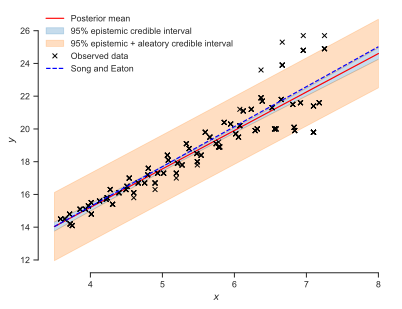

In [142]:
xx = np.linspace(3.5, 8, 1000)
Phi_xx = get_polynomial_design_matrix(xx[:, None], degree)

plot_posterior_predictive(
    model,
    xx,
    get_polynomial_design_matrix,
    phi_func_args=(degree,),
    y_true=None
)

We can extract the model parameters from the scikit-learn model object. The model parameters are the constants 1/$\kappa$ and $B$ for the Re = 1100 case. The output of a Bayesian Linear regression model is a distribution of model parameters. This is what is called a posterior distribution. It is a distribution that has been conditioned on the data. Below, we will plot this distribution. This shows you how we got the credible intervals seen in the prediction graph. Using the mean model parameters, we get the posterior mean prediction of the red line. When using model parameters from other parts of the distribution, 95% of those lines would fall within the shaded region. This is what is called a credible interval. It is the Bayesian equivalent of a confidence interval.

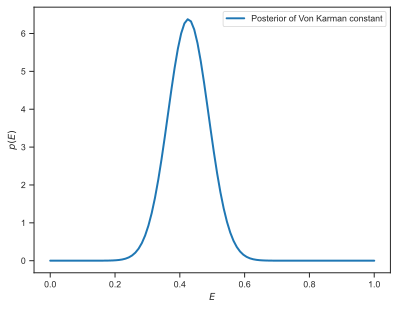

In [143]:
c = model.coef_
S = model.sigma_
# The von Karman constant is the inverse of the slope
vK = 1 / c[1]

ys = np.linspace(0, 1, 100)

# Calculate Posterior of the Von Karman constant
vonK_post = st.norm(vK, np.sqrt(S[1,1]))
vonK_post_pdf = st.norm.pdf(ys, vK, np.sqrt(S[1,1]))

# Plot
fig, ax = plt.subplots()
ax.plot(ys, vonK_post_pdf, lw=2, label='Posterior of Von Karman constant')
ax.set_xlabel(r"$E$")
ax.set_ylabel(r"$p(E)$")
plt.legend(loc="best");

The model is 95% confident that the true value of the model parameters fall within the interval given below. Again, this is taken from the posterior distribution of the model parameters.

In [144]:
# Find the 95% credible interval for the Von Karman constant
lower_bound = vonK_post.ppf(0.025)
upper_bound = vonK_post.ppf(0.975)
print(f'95% credible interval for the Von Karman constant= [{lower_bound:1.2f}, {upper_bound:1.2f}]')

95% credible interval for the Von Karman constant= [0.30, 0.55]


In [145]:
# print the median of the posterior of the Von Karman constant
median = vonK_post.median()
print(f'Median of the posterior of Von Karman constant = {median:1.2f}')
print('The median is a good choice for a single Von Karman value because it is the 50th percentile of the posterior distribution.')
print('This is more robust than the mean, which is sensitive to outliers.')

Median of the posterior of Von Karman constant = 0.43
The median is a good choice for a single Von Karman value because it is the 50th percentile of the posterior distribution.
This is more robust than the mean, which is sensitive to outliers.


Now repeat the above for B, the intercept of the model. I will extract the distribution for you.

In [146]:
B = c[0]

# Your code here

95% credible interval for the intercept = [5.14, 6.50]
Median of the posterior of the intercept = 5.82


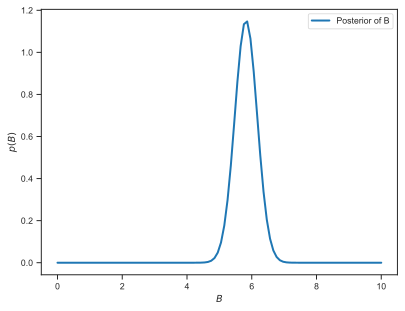

In [147]:
yt = np.linspace(0, 10, 100)

B_post = st.norm(B, np.sqrt(S[0,0]))
B_post_pdf = st.norm.pdf(yt, B, np.sqrt(S[0,0]))

# Plot
fig, ax = plt.subplots()
ax.plot(yt, B_post_pdf, lw=2, label='Posterior of B')
ax.set_xlabel(r"$B$")
ax.set_ylabel(r"$p(B)$")
plt.legend(loc="best");

# Find the 95% credible interval for the intercept
B_lower_bound = B_post.ppf(0.025)
B_upper_bound = B_post.ppf(0.975)
print(f'95% credible interval for the intercept = [{B_lower_bound:1.2f}, {B_upper_bound:1.2f}]')

# print the median of the posterior of the intercept
B_median = B_post.median()
print(f'Median of the posterior of the intercept = {B_median:1.2f}')

In [Song and Eaton](https://doi.org/10.1007/s00348-003-0696-8) the von Karman constant found by is 0.41 and the B value is 5.5. Compare this to the constants that you found. How do they compare? Why do you think this is?

*Your answer here:*

They are very close to what we found, though they are slightly different. Once we observe more data from other Reynolds numbers, the constants will likely converge to the values found in the paper. This is because the constants are not dependent on the Reynolds number. They are dependent on the flow geometry and the fluid properties.

#### Part D: Law of the Wall for All Reynolds Numbers

Now that you have seen how to build one of these model. You will combine the data from all the Reynolds numbers and build a model for the law of the wall for all Reynolds numbers. You will then plot the law of the wall for all Reynolds numbers and compare it to the original model and what is used in the paper. Remember to only use the data that is outside of the viscous sublayer. Use as many blocks as you need. 

In [148]:
# Your code here

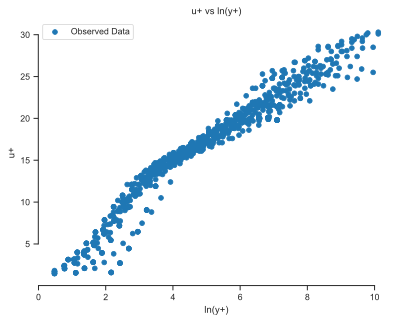

In [149]:
# create log of y+ data for all dataframes
for df in dfs:
    df['y_log'] = np.log(df['yplus[ref]'])

# extract the log y+ and u+ data from all dataframes and put into numpy array
y_log = np.concatenate([df['y_log'].values for df in dfs])
u_plus = np.concatenate([df['U[i]'].values for df in dfs])

# plot the log of the y+ data vs the u+ data
fig, ax = plt.subplots()
ax.scatter(y_log, u_plus, label="Observed Data")
ax.set_xlabel("ln(y+)")
ax.set_ylabel("u+")
ax.set_title("u+ vs ln(y+)")
ax.legend()
sns.despine(trim=True)

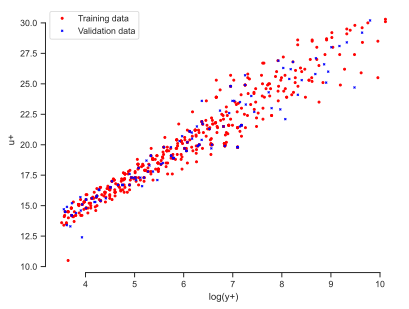

In [150]:
# remove the viscous sublayer data
x_data = y_log[y_log > 3.5]
y_data = u_plus[y_log > 3.5]

# split the data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# visualize the training and validation data
plt.figure()
plt.plot(
    x_train,
    y_train,
    'ro',
    markersize=2,
    label='Training data'
)
plt.plot(
    x_valid,
    y_valid,
    'bx',
    markersize=2,
    label='Validation data'
)
plt.xlabel('log(y+)')
plt.ylabel('u+')
plt.legend()
sns.despine(trim=True);

In [151]:

# The degree of 1 defines the model to be linear
degree = 1

# Design matrix
Phi = get_polynomial_design_matrix(x_train[:, None], degree)

# Fit
model = BayesianRidge(
    fit_intercept=False
).fit(Phi, y_train)

In [152]:

# From scikit-learn: model.alpha_ is the "Estimated precision of the noise."
sigma = np.sqrt(1.0 / model.alpha_)
print(f'sigma = {sigma:1.4f}')

Phi_valid = get_polynomial_design_matrix(
    x_valid[:, None],
    degree
)
y_predict, y_std = model.predict(
    Phi_valid,
    return_std=True
)

# calculate mean squared error
mse = np.mean((y_predict - y_valid) ** 2)
print(f'MSE = {mse:1.2f}')

sigma = 1.0463
MSE = 1.24


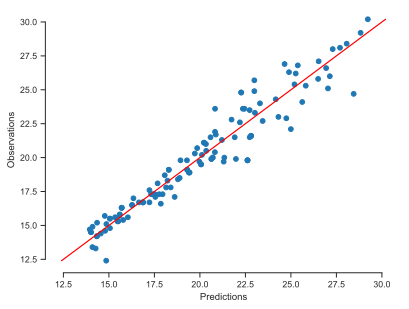

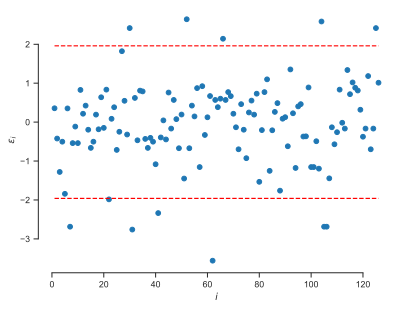

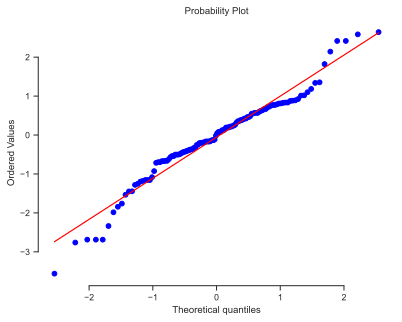

In [153]:
# create parity plot
fig, ax = plt.subplots()
ax.plot(y_predict, y_valid, 'o')
yys = np.linspace(
    y_valid.min(),
    y_valid.max(),
    100)
ax.plot(yys, yys, 'r-')
ax.set_xlabel('Predictions')
ax.set_ylabel('Observations')
sns.despine(trim=True);

eps = (y_valid - y_predict) / y_std
idx = np.arange(1, eps.shape[0] + 1)

# create standardized error plot
fig, ax = plt.subplots()
ax.plot(idx, eps, 'o', label='Standarized errors')
ax.plot(idx, 1.96 * np.ones(eps.shape[0]), 'r--')
ax.plot(idx, -1.96 * np.ones(eps.shape[0]), 'r--')
ax.set_xlabel('$i$')
ax.set_ylabel('$\epsilon_i$')
sns.despine(trim=True);

# create QQ plot
fig, ax = plt.subplots()
st.probplot(eps, dist=st.norm, plot=ax)
sns.despine(trim=True)


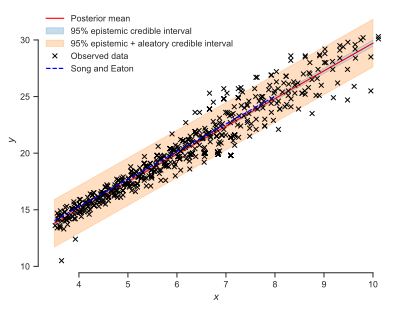

In [154]:
xx = np.linspace(3.5, 10, 1000)
Phi_xx = get_polynomial_design_matrix(xx[:, None], degree)

plot_posterior_predictive(
    model,
    xx,
    get_polynomial_design_matrix,
    phi_func_args=(degree,),
    y_true=None
)

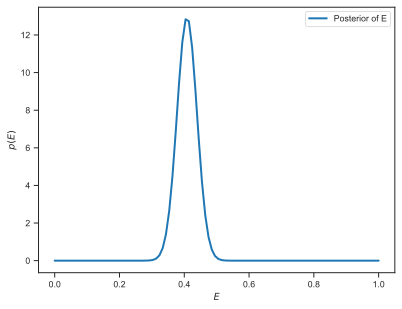

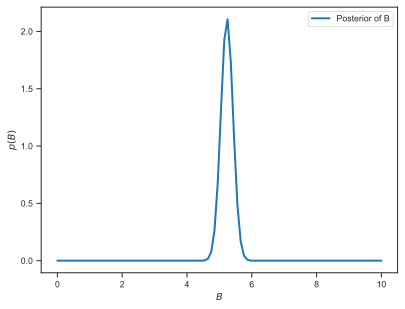

In [155]:
c = model.coef_
S = model.sigma_
# The von Karman constant is the inverse of the slope
vK = 1 / c[1]

ys = np.linspace(0, 1, 100)

# Calculate Posterior of the Von Karman constant
vonK_post = st.norm(vK, np.sqrt(S[1,1]))
vonK_post_pdf = st.norm.pdf(ys, vK, np.sqrt(S[1,1]))

# Plot
fig, ax = plt.subplots()
ax.plot(ys, vonK_post_pdf, lw=2, label='Posterior of E')
ax.set_xlabel(r"$E$")
ax.set_ylabel(r"$p(E)$")
plt.legend(loc="best");


B = c[0]
yt = np.linspace(0, 10, 100)

B_post = st.norm(B, np.sqrt(S[0,0]))
B_post_pdf = st.norm.pdf(yt, B, np.sqrt(S[0,0]))

# Plot
fig, ax = plt.subplots()
ax.plot(yt, B_post_pdf, lw=2, label='Posterior of B')
ax.set_xlabel(r"$B$")
ax.set_ylabel(r"$p(B)$")
plt.legend(loc="best");


In [156]:
# Find the 95% credible interval for the Von Karman constant
lower_bound = vonK_post.ppf(0.025)
upper_bound = vonK_post.ppf(0.975)
print(f'95% credible interval for the Von Karman constant= [{lower_bound:1.2f}, {upper_bound:1.2f}]')

# Find the 95% credible interval for the intercept
B_lower_bound = B_post.ppf(0.025)
B_upper_bound = B_post.ppf(0.975)
print(f'95% credible interval for the intercept = [{B_lower_bound:1.2f}, {B_upper_bound:1.2f}]')

95% credible interval for the Von Karman constant= [0.35, 0.47]
95% credible interval for the intercept = [4.86, 5.60]


In [157]:
# print the median of the posterior of the Von Karman constant
median = vonK_post.median()
print(f'Median of the posterior of Von Karman constant = {median:1.2f}')
print('The median is a good choice for a single Von Karman value because it is the 50th percentile of the posterior distribution.')
print('This is more robust than the mean, which is sensitive to outliers.')

# print the median of the posterior of the intercept
B_median = B_post.median()
print(f'Median of the posterior of the intercept = {B_median:1.2f}')

Median of the posterior of Von Karman constant = 0.41
The median is a good choice for a single Von Karman value because it is the 50th percentile of the posterior distribution.
This is more robust than the mean, which is sensitive to outliers.
Median of the posterior of the intercept = 5.23


Yes, after using all of the data, the model parameters are very close to the values used in the paper. This is because the model is more accurate when it has more data to train on.